# Explore here

# Campaña de Marketing Bancario


##### Importación de librerías necesarias

In [23]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Librería para el escalado de varibles, asegurando mismo rango (0 a 1):
from sklearn.preprocessing import MinMaxScaler

# Librería codificar variables categóricas a numéricas:
from sklearn.preprocessing import LabelEncoder

# Librería para generar un modelo de Regresión Lineal: 
import statsmodels.api as sm

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para generar un modelo XGBoost:
import xgboost as xgb

# Librería para calcular el VIF: 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Librería para instanciar un escalador normalizado:
from sklearn.preprocessing import StandardScaler

# Librería para el uso de modelos de Regresión Lineal:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# Librería para utilizar métricas de evaluación de modelos de Machine Learning:
from sklearn.metrics import *

# Librerías para evitar la aparición de muchos Warnings al final del proyecto:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignorar las advertencias de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Metodo Z-score para detectar outliers
from scipy.stats import zscore

from sklearn.feature_selection import f_classif, SelectKBest

# Modelo de regresión logística para entrenar nuestro modelo:
from sklearn.linear_model import LogisticRegression

# Ajuste de hiperparámetros de un modelo.
from sklearn.model_selection import GridSearchCV



### Paso 1.  Lectura de datos.

Lo primero que haremos será leer y guardar en una variable la información para trabajar con ella.

Para ello, se ha guaradado el archivo con todos los datos en la ruta:https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv y se ha cargado en un Data Frame:

In [2]:
# Importamos el archivo e imprimimos las primeras filas del dataframe para tener una visión rápida del conjunto
data_bank = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncarlas al visualizarlo
pd.set_option('display.max_columns', None)

# Se muestran las 5 primeras filas del Data Frame
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Tras haber cargado el DataFrame debemos ver la cantidad de información que contiene. 
- Recurrimos al atributo shape:

In [3]:
print (f" El conjunto de datos cuenta con información de {data_bank.shape[0]} clientes con un total de {data_bank.shape[1]} datos característicos de cada uno de ellos.")

 El conjunto de datos cuenta con información de 41188 clientes con un total de 21 datos característicos de cada uno de ellos.


### Paso 2: Realiza un EDA completo

Es fundamental la realización del EDA para poder identificar patrones, detectar valores atípico y poder eliminar las variables que no sean extrictamente necesarias.


In [4]:
# Resumen conciso del DataFrame:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No existen valores nulos en ninguna de las 21 columnas

Existen 10 variable numéricas y 11 variables categóricas.

### Paso 2.1 - Análisis de Duplicados y Constantes:
Uno de los puntos críticos a la hora de realizar un análisis, es la existencia de variables / características comunes a todos los clientes, dado que sería información redundante y no aportaría valor al estudio, es decir, el análisis sería el mismo aunque no estuviesen como variables y, por lo tanto, se podría prescindir de ellas.

In [5]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda data_bank: (data_bank.nunique() == 1).sum())(data_bank)} columnas en el Data Frame con un valor constante para todos los clientes.");

# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
data_bank.nunique()

 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los clientes.
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

A partir del resultado obtenido, se puede observar que no hay ninguna constante en los datos cargados, por lo tanto, no hay que eliminar ninguna columna, de momento.

-

Otro factor determinante a la hora de realizar una limpieza de los datos es detectar si hay datos repetidos, aplicado a este caso, si hay clientes duplicados.

In [6]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data_bank.duplicated().sum()} clientes duplicados.")

# Al existir duplicados los visualizamos:
duplicados = data_bank.duplicated(keep=False)
filas_duplicadas = data_bank[duplicados]
filas_duplicadas

# Finalmente eliminamos los duplicados:
data_bank = data_bank.drop_duplicates()
data_bank.shape

 Hay un total de 12 clientes duplicados.


(41176, 21)

### Paso 2.2 - Análisis de Nulos:
Uno de los problemas que es habitual encontrarse en el análisis de datos es variables sin valor, nulos.

Es por ello que se deben tratar estos casos para o bien eliminarlos o bien rellenarlos con un valor coherente para cada uno.

En este caso, como vimos en el inicio del punto 2. No existen valores nulos en ninguna de las 21 columnas

### Paso 2.3 - Gráfica de variables.

#### Gráficas de variables categóricas

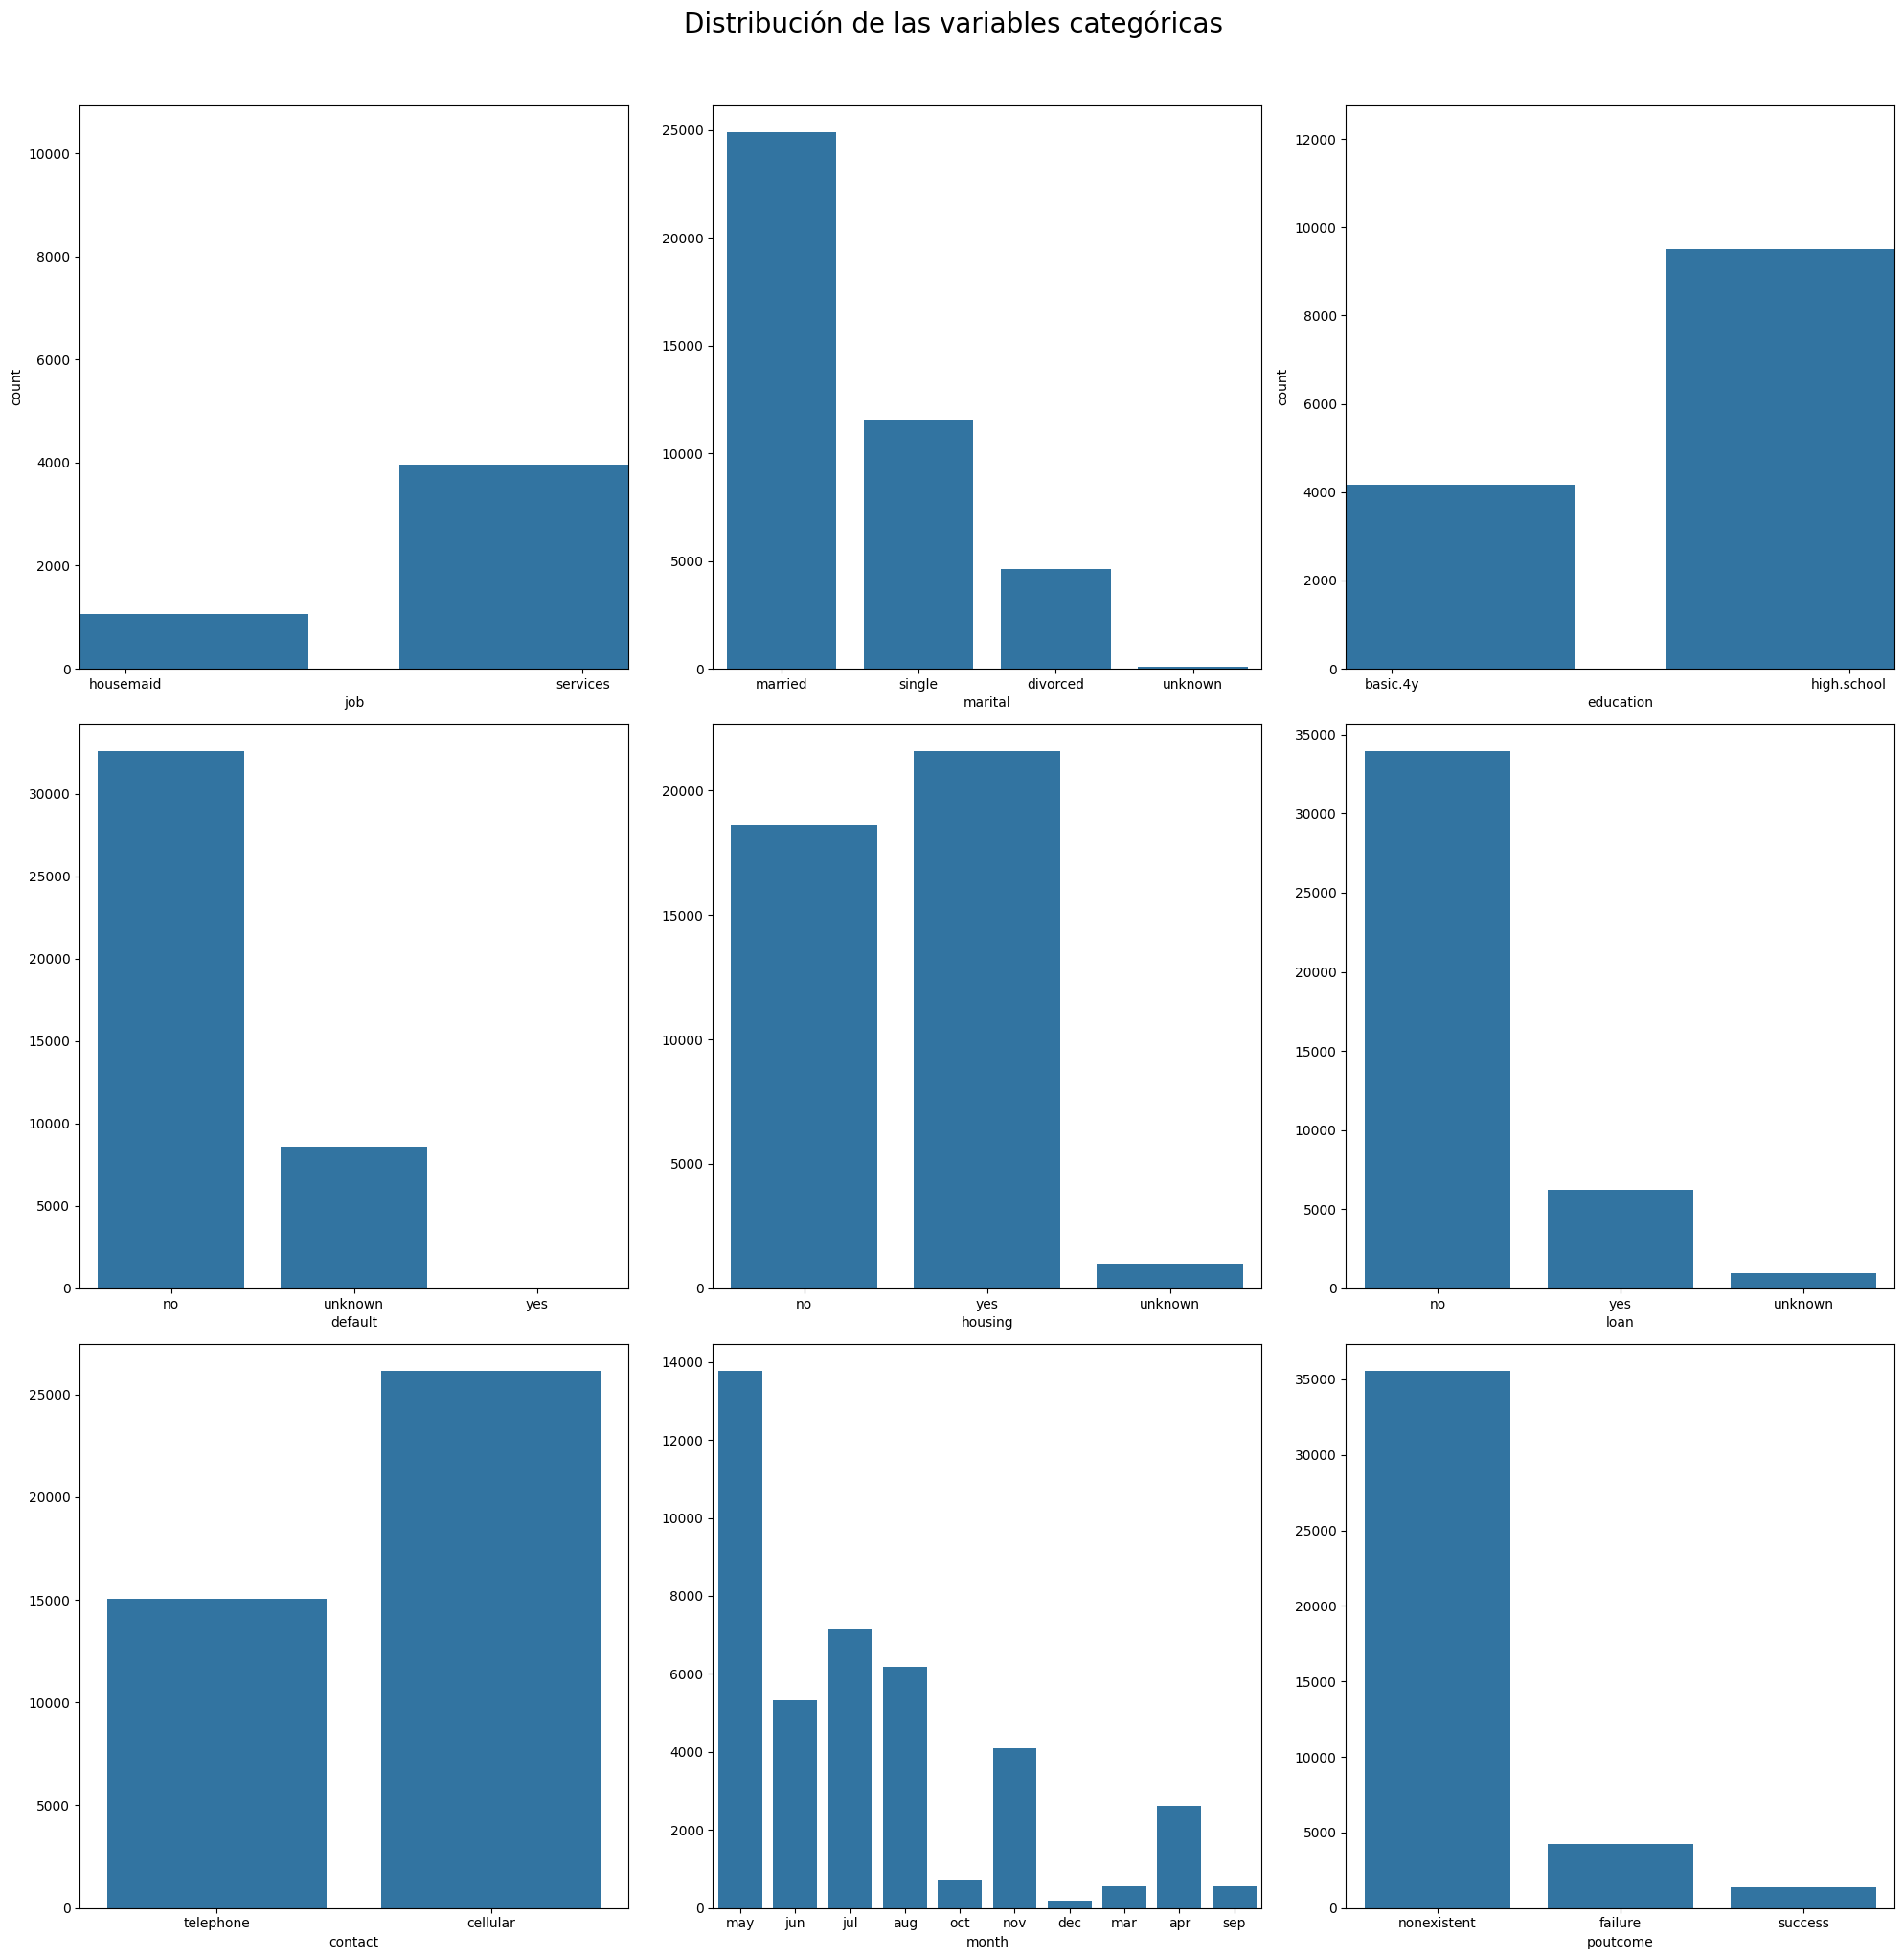

In [7]:
fig, axis = plt.subplots(3, 3, figsize = (20, 20))

# Añadir un título global al conjunto de subplots
fig.suptitle("Distribución de las variables categóricas", fontsize=20, y=1.02)

# Generamos gráficos de barras para visualizar las variables categóricas.
sns.countplot(ax = axis[0, 0], data = data_bank, x = "job").set_xlim(-0.1, 1.1)
sns.countplot(ax = axis[0, 1], data = data_bank, x = "marital").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = data_bank, x = "education").set_xlim(-0.1, 1.1)
sns.countplot(ax = axis[1, 0], data = data_bank, x = "default").set(ylabel = None)
sns.countplot(ax = axis[1, 1], data = data_bank, x = "housing").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = data_bank, x = "loan").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = data_bank, x = "contact").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = data_bank, x = "month").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = data_bank, x = "poutcome").set(ylabel = None)


# Ajustar el layout y título
plt.tight_layout()


# Mostrar el plot
plt.show()

#### Gráficas de variables numéricas

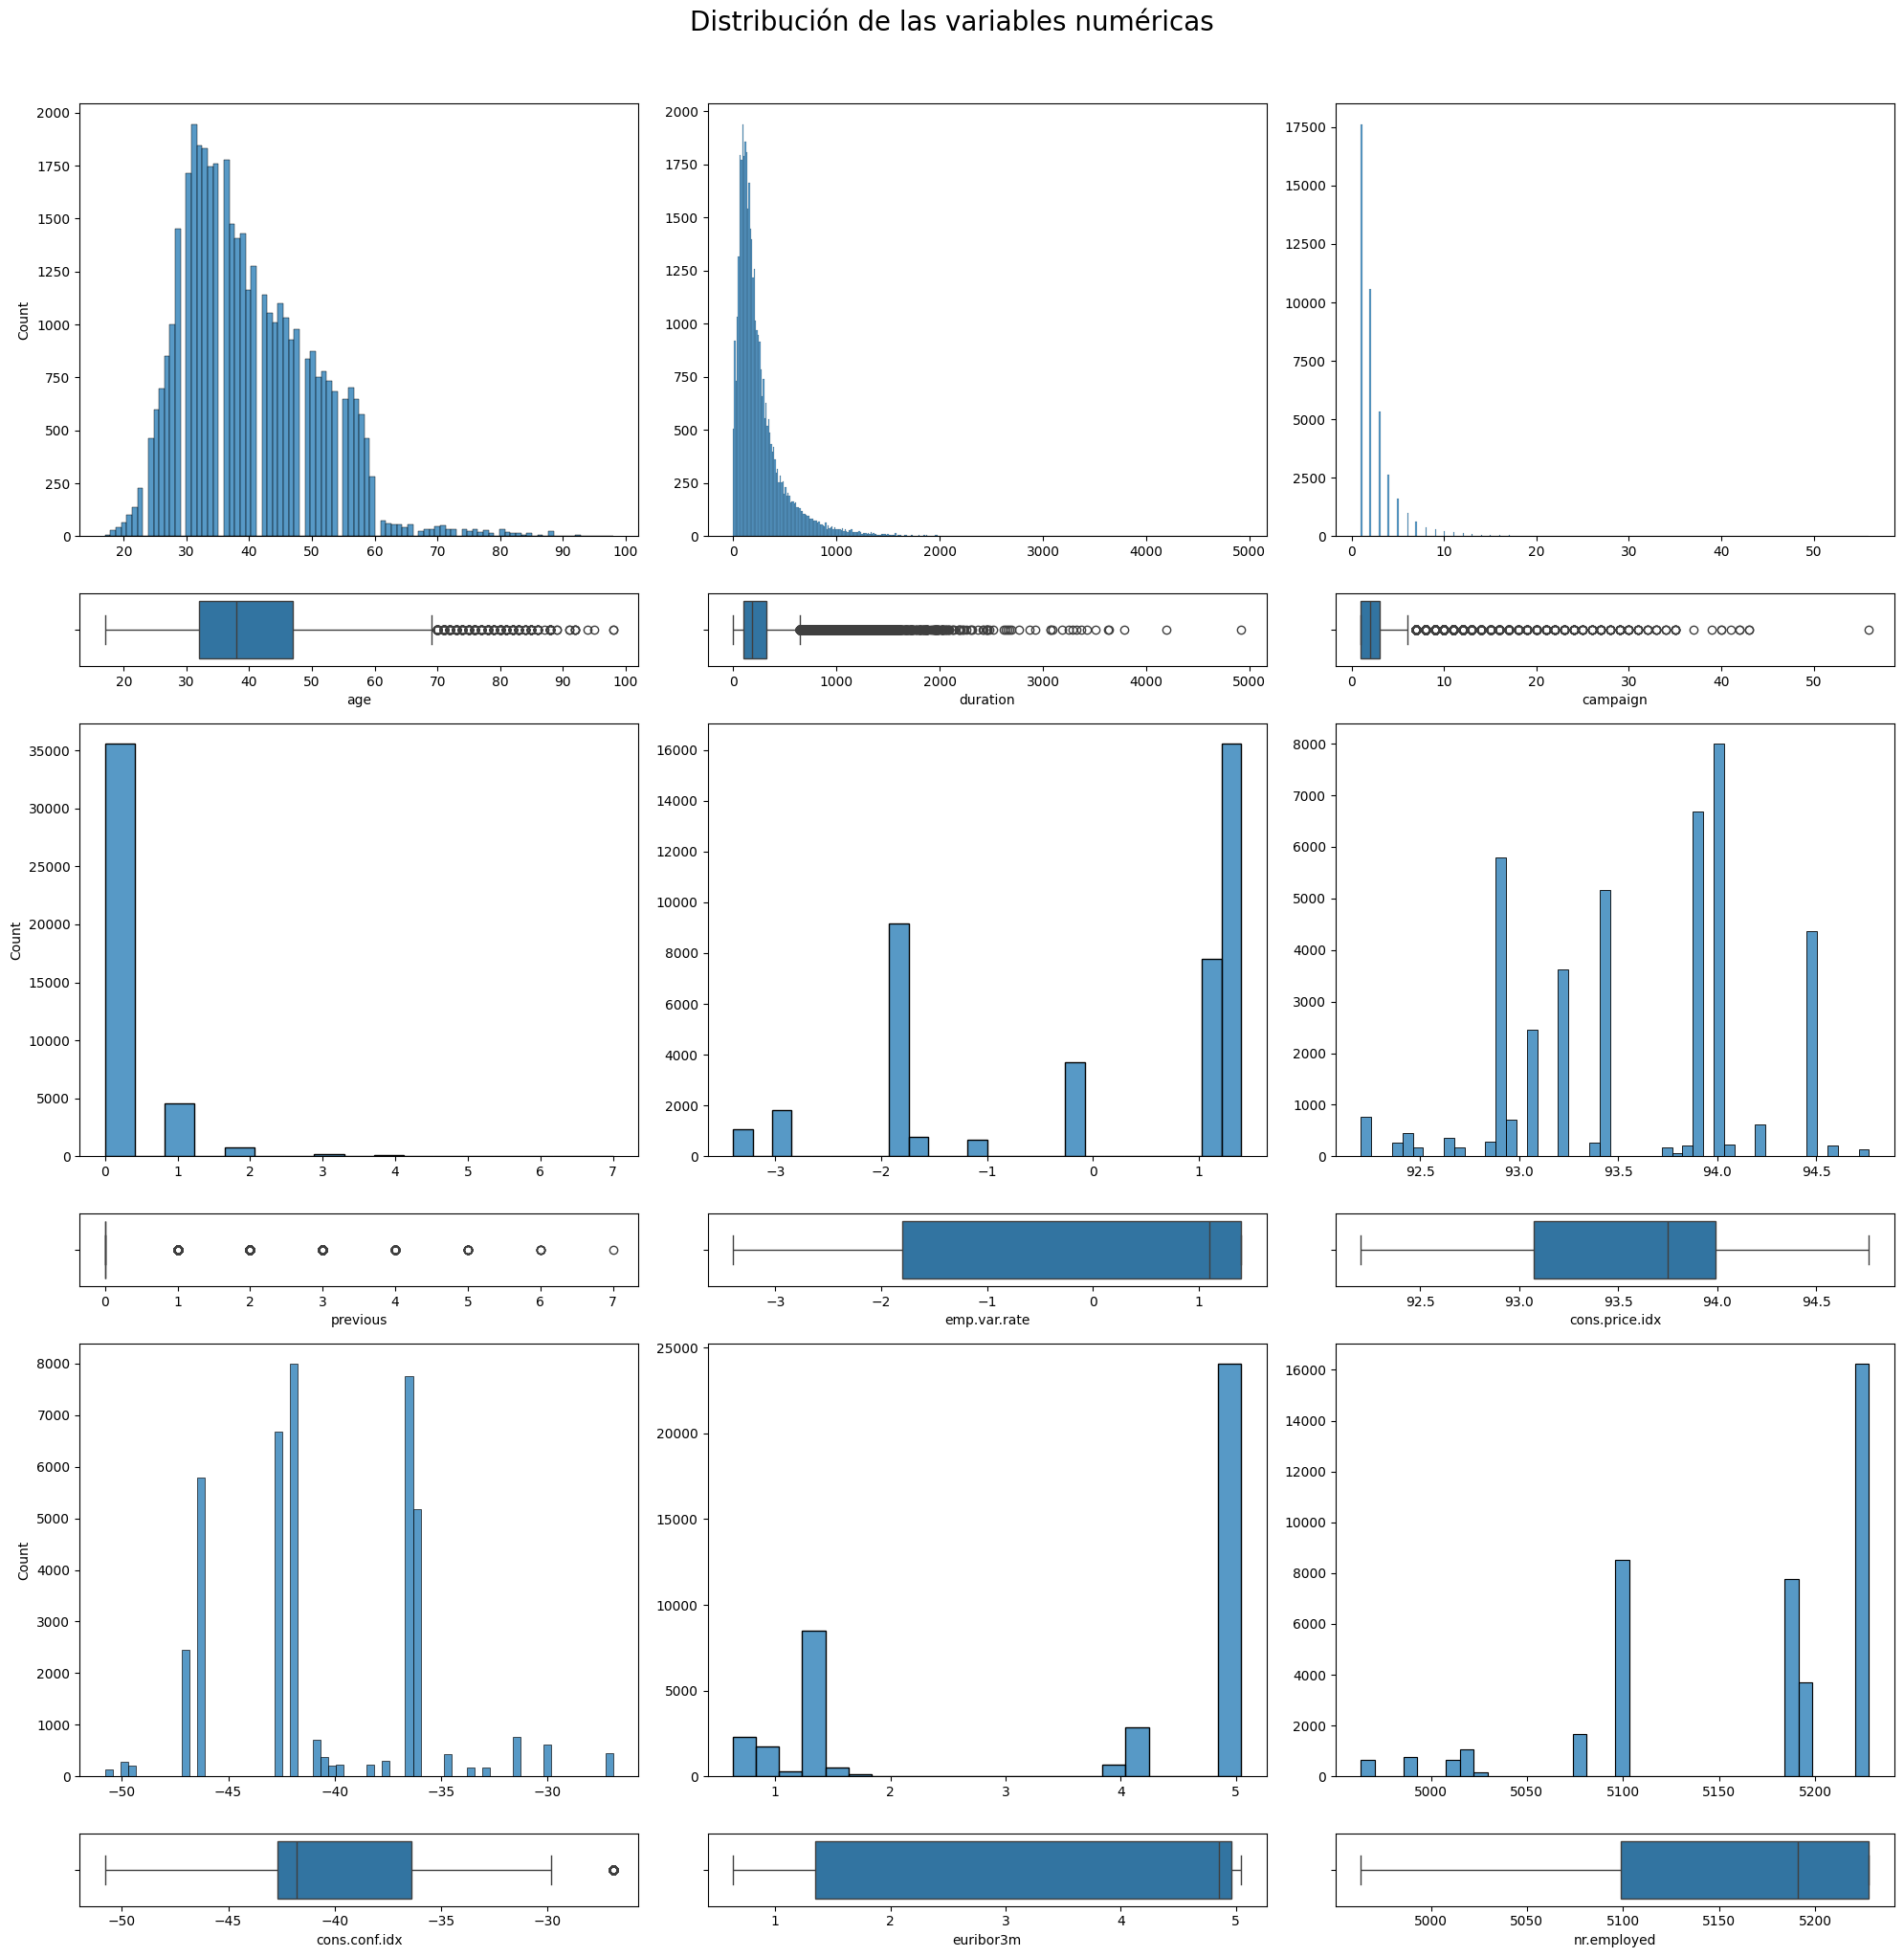

In [8]:
# Crear una figura con los histogramas y diagramas de caja
fig, axis = plt.subplots(6, 3, figsize=(20, 20), gridspec_kw={"height_ratios": [6, 1, 6, 1, 6, 1]})

# Añadir un título global al conjunto de subplots
fig.suptitle("Distribución de las variables numéricas", fontsize=20, y=1.02)

# Creanos los múltiples histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=data_bank, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data_bank, x="age")
sns.histplot(ax=axis[0, 1], data=data_bank, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data_bank, x="duration")
sns.histplot(ax=axis[0, 2], data=data_bank, x="campaign").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=data_bank, x="campaign")
sns.histplot(ax=axis[2, 0], data=data_bank, x="previous").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=data_bank, x="previous")
sns.histplot(ax=axis[2, 1], data=data_bank, x="emp.var.rate").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=data_bank, x="emp.var.rate")
sns.histplot(ax=axis[2, 2], data=data_bank, x="cons.price.idx").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 2], data=data_bank, x="cons.price.idx")
sns.histplot(ax=axis[4, 0], data=data_bank, x="cons.conf.idx").set(xlabel=None)
sns.boxplot(ax=axis[5, 0], data=data_bank, x="cons.conf.idx")
sns.histplot(ax=axis[4, 1], data=data_bank, x="euribor3m").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[5, 1], data=data_bank, x="euribor3m")
sns.histplot(ax=axis[4, 2], data=data_bank, x="nr.employed").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[5, 2], data=data_bank, x="nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


De estas gráficas extraemos que tenemos varios outlaiers en "age", "duration" y "campaign".

#### Análisis numérico - numérico

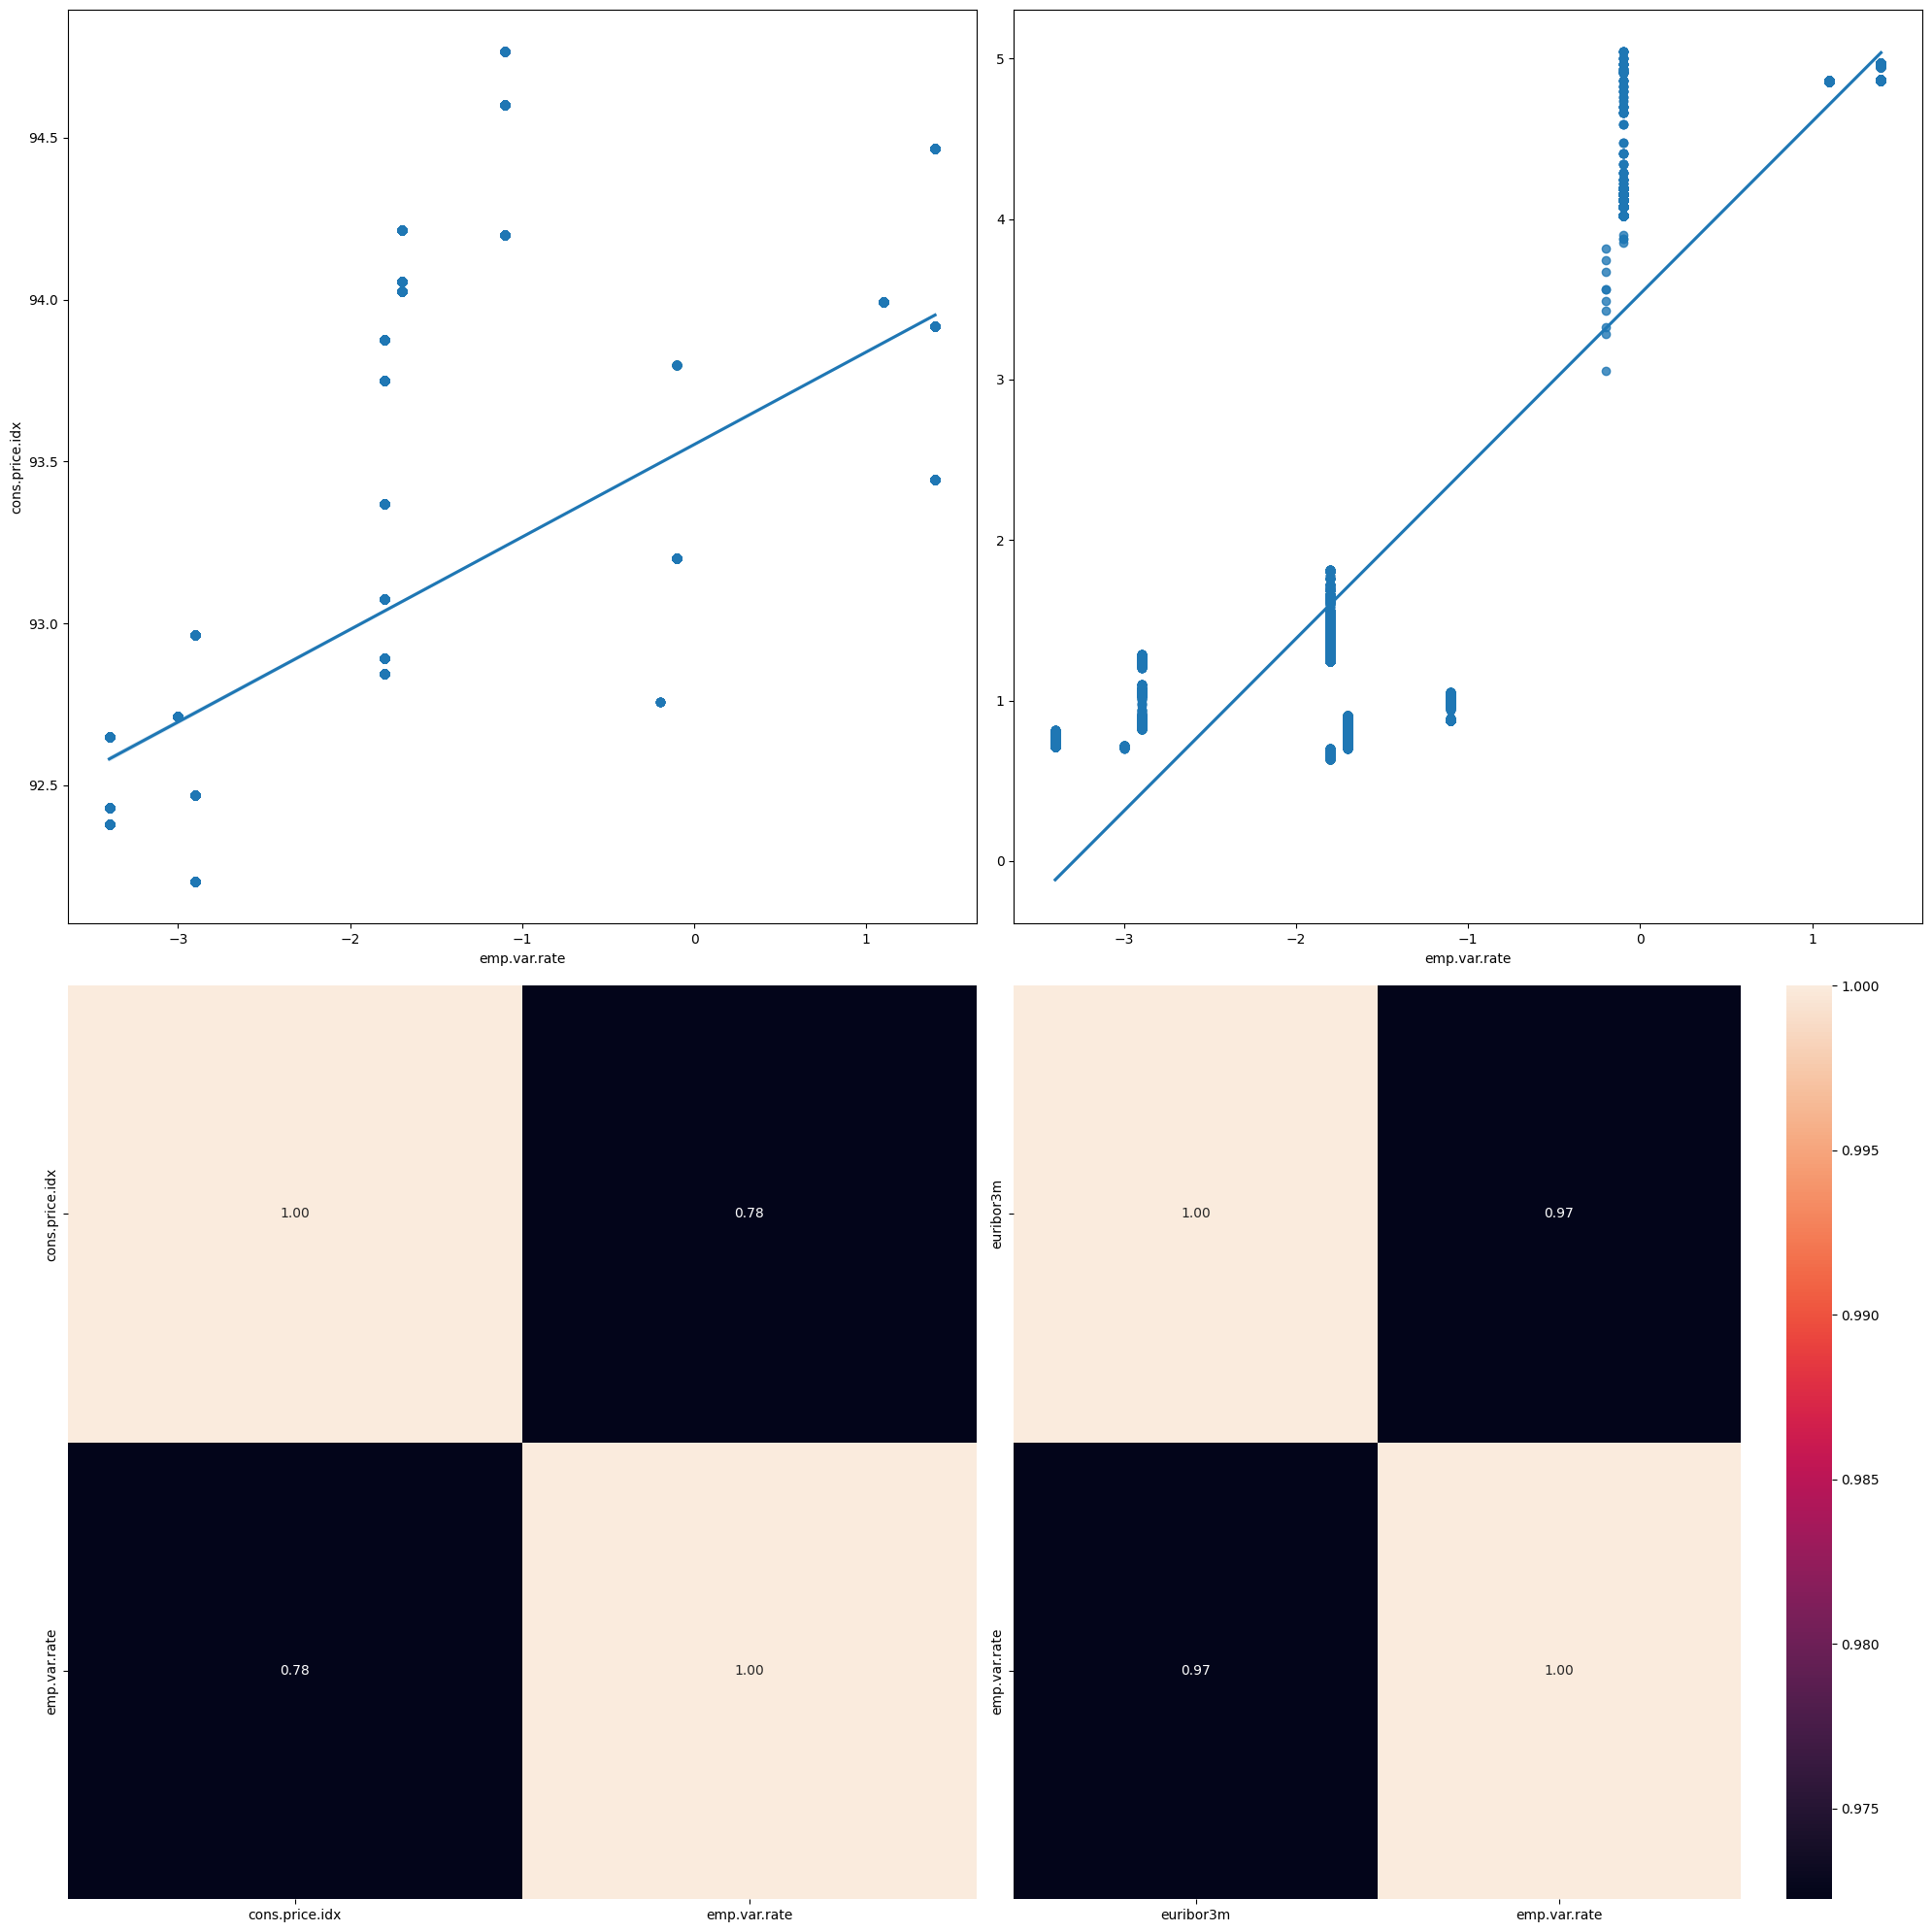

In [9]:
# Creamos la figura para los diagramas
fig, axis = plt.subplots(2, 2, figsize = (20, 20))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_bank, x = "emp.var.rate", y = "cons.price.idx")
sns.heatmap(data_bank[["cons.price.idx", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_bank, x = "emp.var.rate", y = "euribor3m").set(ylabel=None)
sns.heatmap(data_bank[["euribor3m", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Paso 2.4 - Análisis de Observaciones Influyentes:
En este paso se va a proceder a realizar uno de los puntos clave en el Análisis Exploratorio de Datos, la Identificación de Observaciones Influyentes.

Sin embargo, para poder realizar este paso, es necesario que todas las variables con las que se trabaja sean numéricas.

In [10]:
# Convertimos todas las variables categóricas a numéricas

data_bank["job_n"] = pd.factorize(data_bank["job"])[0]
data_bank["marital_n"] = pd.factorize(data_bank["marital"])[0]
data_bank["education_n"] = pd.factorize(data_bank["education"])[0]
data_bank["default_n"] = pd.factorize(data_bank["default"])[0]
data_bank["housing_n"] = pd.factorize(data_bank["housing"])[0]
data_bank["loan_n"] = pd.factorize(data_bank["loan"])[0]
data_bank["contact_n"] = pd.factorize(data_bank["contact"])[0]
data_bank["month_n"] = pd.factorize(data_bank["month"])[0]
data_bank["day_of_week_n"] = pd.factorize(data_bank["day_of_week"])[0]
data_bank["poutcome_n"] = pd.factorize(data_bank["poutcome"])[0]
data_bank["y_n"] = pd.factorize(data_bank["y"])[0]

# Ahora creamos una lista con todas las variable numéricas (incluyendo las variables categóricas que acabamos de transformar)
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

# Escalado de variables numéricas usando Min-Max Escaler. Así nos aseguramos de que todas las variables estén en el mismo rango (0 a 1)
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_bank[num_variables])
data_bank = pd.DataFrame(scal_features, index=data_bank.index, columns=num_variables)
data_bank.head()


,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


Una vez ya se cuenta con todas las características numéricas, se puede proceder a identificar las observaciones influyentes.

Para ello, en primer lugar es necesario identificar cuál será, de ahora en adelante la variable dependiente, es decir, la variable a predecir y separar tanto esta como todas las relacionadas con ella.

En este caso consideramos como la variable a predecir: "y_n"

#### Análisis de correlaciones

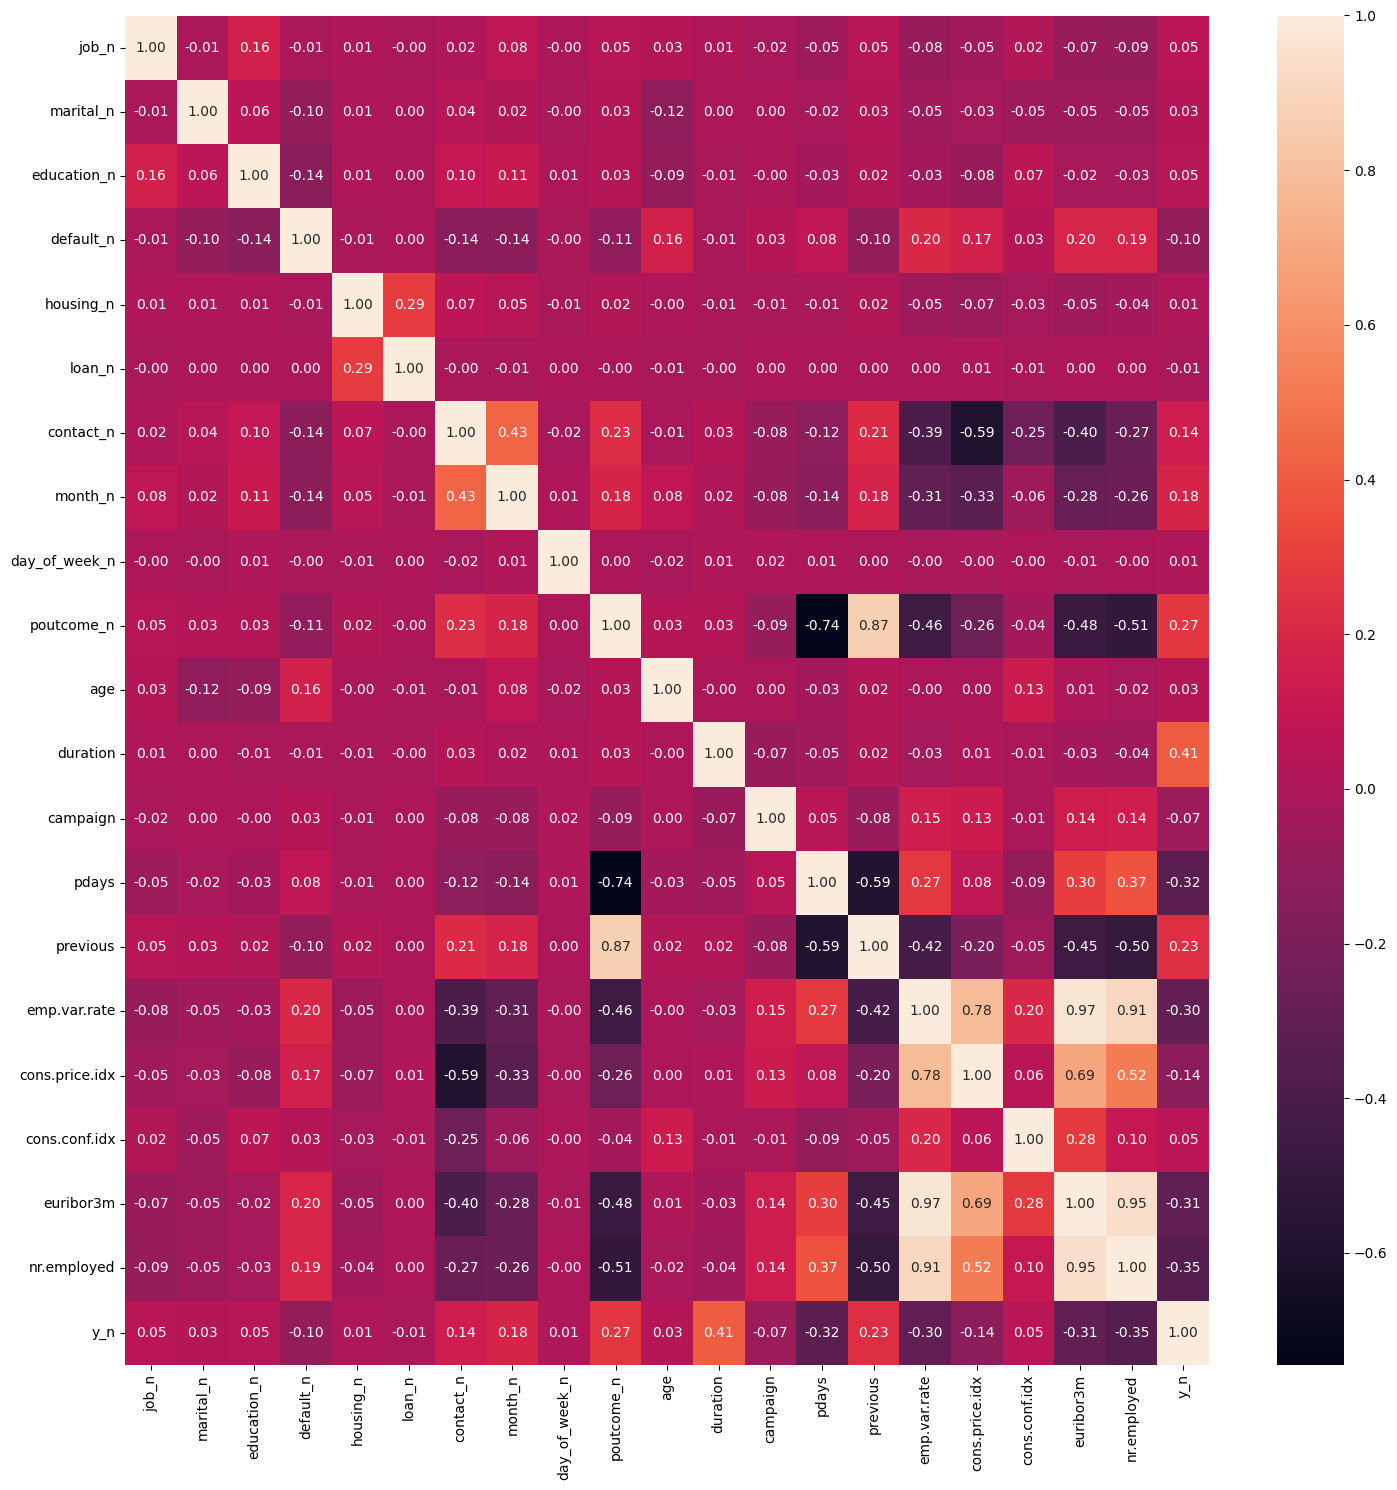

In [11]:
# Definir el tamaño de la figura
plt.figure(figsize=(15, 15))  # Cambia los valores según tus necesidades

# Graficamos todas las variables numéricas y las que transformamos a numéricas en el paso anterior (factorizar)
sns.heatmap(data_bank[num_variables].corr(), annot = True, fmt = ".2f")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

### Paso 2.5 Identificación de Outliers

In [12]:
# Detectar valores atípicos que puedan influír en los resultados del análisis
# Uso del método Z-score para detectar outliers

### Paso 2.6 División en conjuntos de entrenamiento y prueba

In [13]:
# Separar variables independientes y dependientes
x = data_bank.drop("y_n", axis = 1)
y = data_bank["y_n"]

# Dividimos el DataFrame en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12348,0.909091,0.000000,0.285714,0.0,0.5,0.5,0.0,0.222222,1.00,0.0,0.148148,0.058154,0.036364,1.0,0.0,1.000000,0.669135,0.338912,0.980503,1.000000
8565,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.111111,0.50,0.0,0.407407,0.036194,0.090909,1.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000
21424,0.181818,0.333333,0.857143,0.0,0.0,0.0,1.0,0.333333,0.25,0.0,0.148148,0.020943,0.054545,1.0,0.0,1.000000,0.484412,0.615063,0.981410,1.000000
3316,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.000000,0.75,0.0,0.222222,0.027450,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.958059,0.859735
33246,0.272727,0.333333,0.142857,0.5,0.0,0.0,1.0,0.000000,0.25,0.0,0.283951,0.084994,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.148946,0.512287


### Paso 2.7 Selección de características con SelectKbest

In [14]:

# Selección de caracaterísticas
selector = SelectKBest(score_func=f_classif, k = 10)
selector.fit(x_train, y_train)

# Mostrar las características seleccionadas
ix = selector.get_support()
x_train_sel = pd.DataFrame(selector.transform(x_train), columns = x_train.columns.values[ix])
x_test_sel = pd.DataFrame(selector.transform(x_test), columns = x_test.columns.values[ix])

x_train_sel.head()

,contact_n,month_n,poutcome_n,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,0.0,0.222222,0.0,0.058154,1.0,0.0,1.000000,0.669135,0.980503,1.000000
1,0.0,0.111111,0.0,0.036194,1.0,0.0,1.000000,0.882307,0.958966,1.000000
2,1.0,0.333333,0.0,0.020943,1.0,0.0,1.000000,0.484412,0.981410,1.000000
3,0.0,0.000000,0.0,0.027450,1.0,0.0,0.937500,0.698753,0.958059,0.859735
4,1.0,0.000000,0.0,0.084994,1.0,0.0,0.333333,0.269680,0.148946,0.512287


In [15]:
# Añadimos nuevamente la variable objetivo y guardamos en archivo .csv en la carpeta /data/procesed
# En este paso añadimos nuevamente la variable objetivo que quitamos con anterioridad a fin de que en el paso anterior al seleccionar k = 5 (por ejemplo) no nos elimine la variable objetivo (price, en este caso)
x_train_sel["y_n"] = list(y_train)
x_test_sel["y_n"] = list(y_test)

x_train_sel.to_csv("/workspaces/machine-learning-python-template_ds_13_david_bank/data/processed/x_train", index = False)
x_test_sel.to_csv("/workspaces/machine-learning-python-template_ds_13_david_bank/data/processed/x_test", index = False)


## Modelo de regresión lineal

In [16]:
# Recuperamos los conjuntos de entrenamiento y test
train_data = pd.read_csv("/workspaces/machine-learning-python-template_ds_13_david_bank/data/processed/x_train")
test_data = pd.read_csv("/workspaces/machine-learning-python-template_ds_13_david_bank/data/processed/x_test")

train_data.head()

,contact_n,month_n,poutcome_n,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_n
0,0.0,0.222222,0.0,0.058154,1.0,0.0,1.000000,0.669135,0.980503,1.000000,0.0
1,0.0,0.111111,0.0,0.036194,1.0,0.0,1.000000,0.882307,0.958966,1.000000,0.0
2,1.0,0.333333,0.0,0.020943,1.0,0.0,1.000000,0.484412,0.981410,1.000000,0.0
3,0.0,0.000000,0.0,0.027450,1.0,0.0,0.937500,0.698753,0.958059,0.859735,0.0
4,1.0,0.000000,0.0,0.084994,1.0,0.0,0.333333,0.269680,0.148946,0.512287,0.0


In [17]:
# Separamos nuevamente la variable objetivo
x_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
x_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [20]:
# Inicializamos el modelo de regresión logística
model = LogisticRegression()

# Entrenamiento del modelo con los datos de entrenamiento
model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

- En un entorno de Jupyter, vuelva a ejecutar esta celda para mostrar la representación HTML o confíe en el cuaderno.
- En GitHub, no se puede mostrar la representación HTML; intente cargar esta página con nbviewer.org


In [21]:
# Predicción con el modelo entrenado.(Realizamos predicciones en las etiquetas correspondientes, almacenándolo en y_pred).
y_pred = model.predict(x_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.], shape=(8236,))

In [22]:
#from sklearn.metrics import accuracy_score
# Calculamos la precisión del modelo comparando las etiquetas verdaderas (y_test) con las etiquetas predichas (y_pred)
accuracy_score(y_test, y_pred)

0.9011656143759106

Obtenemos un resultado del 90.1% en el conjunto de datos de prueba. 
- Es decir, el modelo clasificó correctamente el 90,1% de las observaciones en el conjunto de prueba.
- Esta es una métrica bastante buena, ya que indica que el modelo está haciendo predicciones correctas en la mayoría de los casos. 
- Sin embargo, la precisión es solo una métrica de evaluación y debe considerarse junto con otras métricas (como precisión, recall y F1-score) y la matriz de confusión para obtener una visión más completa del rendimiento del modelo.

## Optimización del modelo

In [24]:
# Ajuste de los hiperparámetros con GridSearch, que buscará la mejor combinación con los hiperparámetros que nosotros le pasemos.

# Creamos un diccionario con los hiperparámetros que queremos ajustar.
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Iniciamos GridSearchCV con el modelo (model), los hiperparámetros que pasamos anteriormente, la métrica de evalución ("accuracy") y el número de particiones para validación cruzada (cv=10)
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)

grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

LogisticRegression()
- En un entorno de Jupyter, vuelva a ejecutar esta celda para mostrar la representación HTML o confíe en el cuaderno.
- En GitHub, no se puede mostrar la representación HTML; intente cargar esta página con nbviewer.org.

In [27]:
# Definimos los mejores valores para los hiperparámetros solicitados:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(x_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


C: 0.001:

El parámetro C controla la regularización del modelo. Un valor más bajo de C implica una mayor regularización, lo que puede ayudar a prevenir el sobreajuste (overfitting). En este caso, C=0.001 sugiere que un alto nivel de regularización es óptimo para tu modelo.

penalty: None:

El parámetro penalty define el tipo de penalización a aplicar en el modelo. None significa que no se está aplicando ninguna penalización. Esto puede indicar que el modelo funciona mejor sin regularización adicional aparte de la proporcionada por C.

solver: newton-cg:

El parámetro solver especifica el algoritmo utilizado para optimizar el modelo. newton-cg es un algoritmo de optimización que es adecuado para problemas de gran tamaño y puede manejar la función de costo utilizada en los modelos de clasificación lineal.

In [30]:
# Predicción nuevamente con el modelo pero ahora ajustados los hiperparámetros:
model = LogisticRegression(C = 0.001, penalty = None, solver = "newton-cg")
model.fit(x_train, y_train)

LogisticRegression(C=0.001, penalty=None, solver='newton-cg')